In [1]:
# https://www.favicon.cc/
import numpy as np
from PIL import Image
im = Image.open('10.ico')
im = im.convert('RGBA')
im

In [2]:
print(im.size)
im_matrix = np.array(im)
print(im_matrix[0][0])

(16, 16)
[0 0 0 0]


In [3]:
for i in range(16):
  for j in range(16):
    print(1 if im_matrix[i][j][-1] else 0, end="")
  print()

0000000000000001
0010000000001111
0111000000111110
0111100000111100
0001111001111100
0000111111110000
0000011111110000
0000001111100000
0000001111100000
0000011111110000
0000011001111000
0001110000111100
0011110000111100
0011100000011110
0011000000001100
0110000000000100


In [4]:
def make_bin_im(im_matrix):
  im_bin = []
  for i in range(16):
    for j in range(16):
      im_bin.append(1 if im_matrix[i][j][-1] else 0)
  return im_bin

In [5]:
from sklearn.neural_network import MLPClassifier

im_10 = make_bin_im(im_matrix)
clf = MLPClassifier(random_state=42).fit([im_10,], [1,])

In [6]:
X_train = []
for ico in ['10.ico', '00.ico']:
  im = Image.open(ico)
  im = im.convert('RGBA')
  im_matrix = np.array(im)
  im_ = make_bin_im(im_matrix)
  X_train.append(im_)
y_train = [1, 0]


X_test = []
for ico in ['11.ico', '01.ico']:
  im = Image.open(ico)
  im = im.convert('RGBA')
  im_matrix = np.array(im)
  im_ = make_bin_im(im_matrix)
  X_test.append(im_)
y_test = [1, 0]

In [7]:
clf = MLPClassifier(random_state=42).fit(X_train, y_train)
clf.predict_proba(X_test)

array([[0.04606285, 0.95393715],
       [0.99310957, 0.00689043]])

In [8]:
clf.predict(X_test)

array([1, 0])

In [9]:
clf.score(X_test, y_test)

1.0

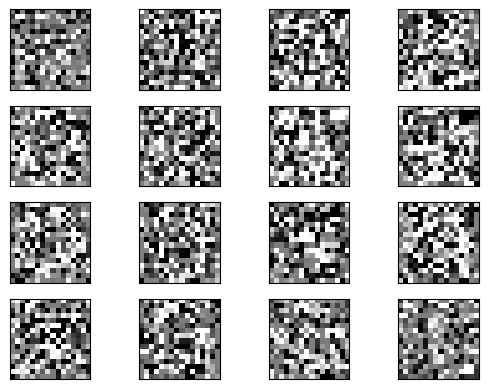

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4)
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(16, 16), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()